In [2]:
import pandas as pd
import numpy as np
#import all

In [3]:
price= pd.read_csv('NADAC_as_of_2017-06-07.csv',dtype={'NDC': str})

In [4]:
price.head(20)

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,OLMESARTAN MEDOXOMIL 20 MG TAB,62332013230,3.69212,06/07/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
1,CETIRIZINE HCL 5 MG TABLET,00378363501,0.05956,05/17/2017,EA,C/I,Y,1,G,NaN,NaN,06/07/2017
2,GLIPIZIDE-METFORMIN 2.5-500 MG,00378313201,0.46064,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
3,RAMIPRIL 5 MG CAPSULE,68180059001,0.08185,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
4,SB COUGH CONTROL DM SYRUP,15127094544,0.01182,05/17/2017,ML,C/I,Y,"1, 5",G,NaN,NaN,06/07/2017
5,LARIN FE 1-20 TABLET,16714040601,0.42287,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
6,FLECAINIDE ACETATE 50 MG TAB,62559038001,0.24606,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
7,ALL DAY RELIEF 220 MG CAPLET,00536109301,0.05699,05/17/2017,EA,C/I,Y,1,G,NaN,NaN,06/07/2017
8,ANASTROZOLE 1 MG TABLET,62756025083,0.12804,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
9,FENTANYL CITRATE OTFC 800 MCG,55253007301,12.75167,10/19/2016,EA,C/I,N,"4, 6",G,NaN,NaN,06/07/2017


In [5]:
price.shape

(24486, 12)

In [6]:
# medicade data uses 11 unit NDC m FDA uses 10 digits instead, here I did the trick according to this website

price['NDC10']=price['NDC'].apply(lambda x: x[0:5]+x[6:])  #de18.founded=de18.founded.apply(lambda x: x[8:])
price.head(10)

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,NDC10
0,OLMESARTAN MEDOXOMIL 20 MG TAB,62332013230,3.69212,06/07/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,6233213230
1,CETIRIZINE HCL 5 MG TABLET,00378363501,0.05956,05/17/2017,EA,C/I,Y,1,G,NaN,NaN,06/07/2017,0037863501
2,GLIPIZIDE-METFORMIN 2.5-500 MG,00378313201,0.46064,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,0037813201
3,RAMIPRIL 5 MG CAPSULE,68180059001,0.08185,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,6818059001
4,SB COUGH CONTROL DM SYRUP,15127094544,0.01182,05/17/2017,ML,C/I,Y,"1, 5",G,NaN,NaN,06/07/2017,1512794544
5,LARIN FE 1-20 TABLET,16714040601,0.42287,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,1671440601
6,FLECAINIDE ACETATE 50 MG TAB,62559038001,0.24606,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,6255938001
7,ALL DAY RELIEF 220 MG CAPLET,00536109301,0.05699,05/17/2017,EA,C/I,Y,1,G,NaN,NaN,06/07/2017,0053609301
8,ANASTROZOLE 1 MG TABLET,62756025083,0.12804,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,6275625083
9,FENTANYL CITRATE OTFC 800 MCG,55253007301,12.75167,10/19/2016,EA,C/I,N,"4, 6",G,NaN,NaN,06/07/2017,5525307301


In [7]:
product= pd.read_csv('product.csv')

In [8]:
product.head(5)

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN
1,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,19500712.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN
2,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
3,0002-1434_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
4,0002-1445_edb0cda9-a6f5-429a-a778-83a3bcd420ee,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,NaN,ixekizumab,"INJECTION, SOLUTION",SUBCUTANEOUS,20160322.0,NaN,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",NaN


In [9]:
package=pd.read_csv('package.csv')

In [10]:
package.head(5)

,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ..."
1,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ..."
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,0002-1407-01,10 mL in 1 VIAL (0002-1407-01)
3,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...
4,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...


In [11]:
product.shape
package.shape

(220912, 4)

In [ ]:

#NADAC_Drug_Cost = pd.read_csv('NADAC__National_Average_Drug_Acquisition_Cost_.csv',low_memory=False)
#NADAC_Comparison = pd.read_csv('NADAC_Comparison.csv',dtype={'NDC':str})
#drug_Revenue = pd.read_csv('State_Drug_Utilization_Data_2016.csv')
#merged1 = pd.merge(NADAC_Drug_Cost,drug_Revenue,how='inner',on='NDC')
#merged1.head()

In [12]:
# merging two FDA files
FDA = pd.merge(package,product,how='inner',on='PRODUCTNDC')
FDA.head()
FDA.shape

(223280, 21)

In [14]:
FDA.to_csv('FDAcode.csv', index=0)

In [15]:
FDA1.tail()

NameError: name 'FDA1' is not defined

In [16]:
import re
def func(x):                                       # replace the - for ''in column:NDCPACKAGECODE for file FDA
    return re.sub('[-]',"", str(x))
#for i in range(3,6):
#FDA1.NDC = FDA1.NDCPACKAGECODE.apply(func)

In [17]:
FDA['NDC'] = FDA['NDCPACKAGECODE'].apply(func)

In [18]:
FDA.head()
FDA.shape

(223280, 22)

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC,NDC Description,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date


(0, 33)

In [19]:
price.head()
FDA.head()

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,...,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",...,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,0002120030
1,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",...,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,0002120050
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,0002-1407-01,10 mL in 1 VIAL (0002-1407-01),0002-1407_14757f9d-f641-4836-acf3-229265588d1d,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,...,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN,0002140701
3,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",...,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,0002143361
4,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",...,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,0002143380


In [20]:
FDA['NDC10']=FDA['NDC']
FDA.head()
FDA.describe()

,STARTMARKETINGDATE,ENDMARKETINGDATE
count,2.232530e+05,3.236000e+03
mean,2.005772e+07,2.018655e+07
std,1.336047e+05,1.902187e+05
min,1.900010e+07,2.017061e+07
25%,2.004101e+07,2.017123e+07
50%,2.011010e+07,2.018062e+07
75%,2.014062e+07,2.018123e+07
max,2.017061e+07,3.031021e+07


In [21]:
# merge the price and FDA table

drug = pd.merge(FDA,price,how='inner',on='NDC10')
drug.head()
drug.shape

(13102, 35)

In [22]:
drug.to_csv('drug.csv', index=0)

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

(array([   51.,  1608.,  4401.,  3622.,  1998.,  1113.,   223.,    57.,
           21.,     8.]),
 array([-6.63012354, -4.98574989, -3.34137624, -1.69700259, -0.05262893,
         1.59174472,  3.23611837,  4.88049202,  6.52486568,  8.16923933,
         9.81361298]),
 <a list of 10 Patch objects>)

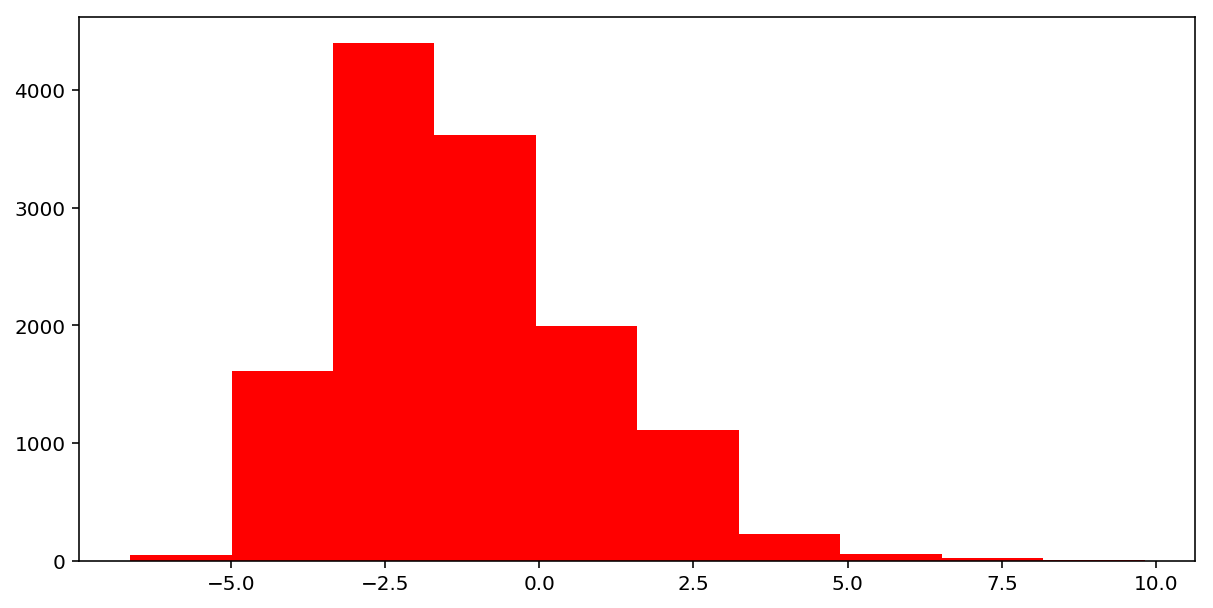

In [26]:
# log unit price
plt.figure(figsize=(10,5))
plt.hist(np.log(drug.NADAC_Per_Unit),color='red')
#plt.xlim(0,100)

interesting features
STARTMARKETINGDATE


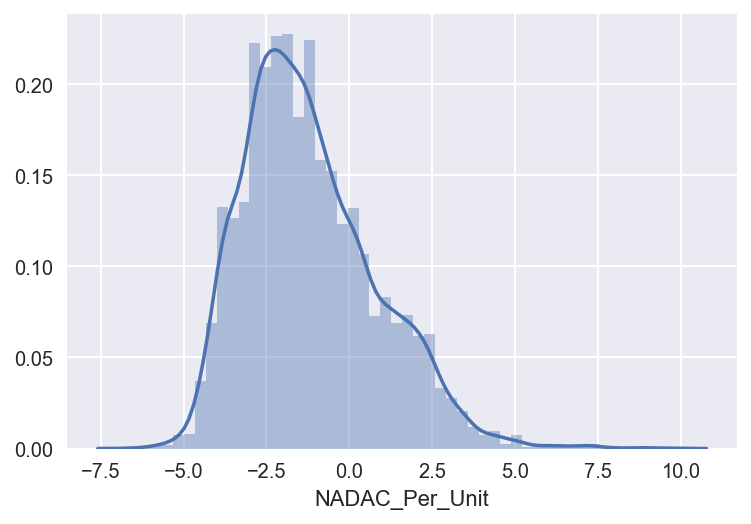

In [29]:
sns.distplot(np.log(drug.NADAC_Per_Unit))

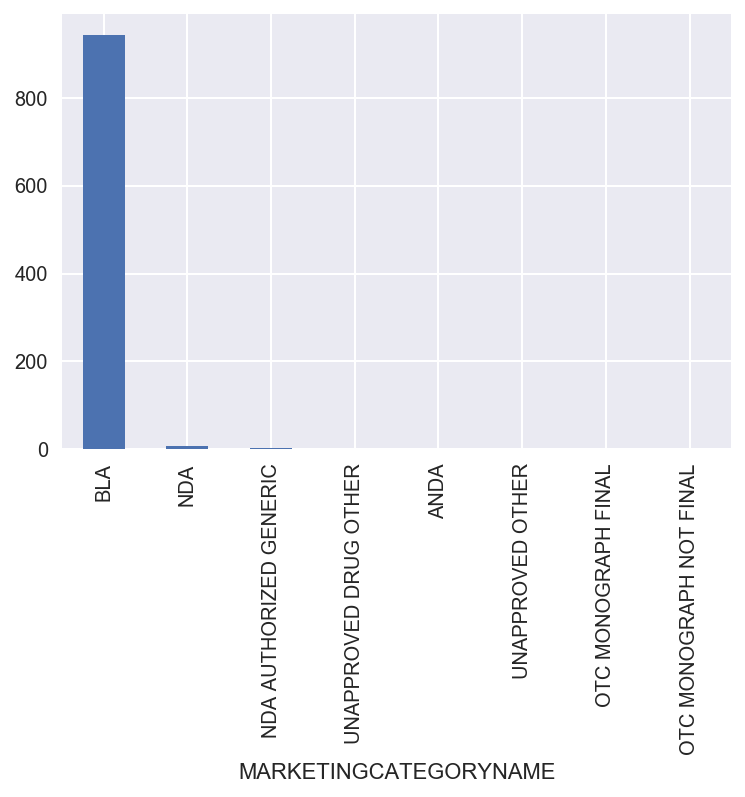

In [30]:
# clearly , BLA drugs are super expensive

drug.groupby('MARKETINGCATEGORYNAME')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar() # by median

(0, 20)

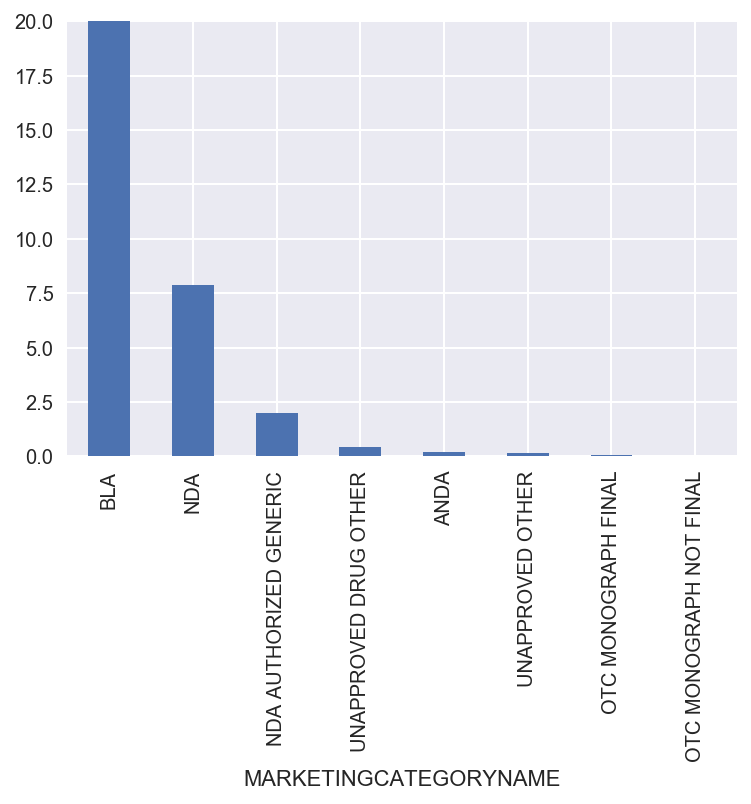

In [125]:
# squeeze the y scale
drug.groupby('MARKETINGCATEGORYNAME')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar() # by median
plt.ylim(0,20)

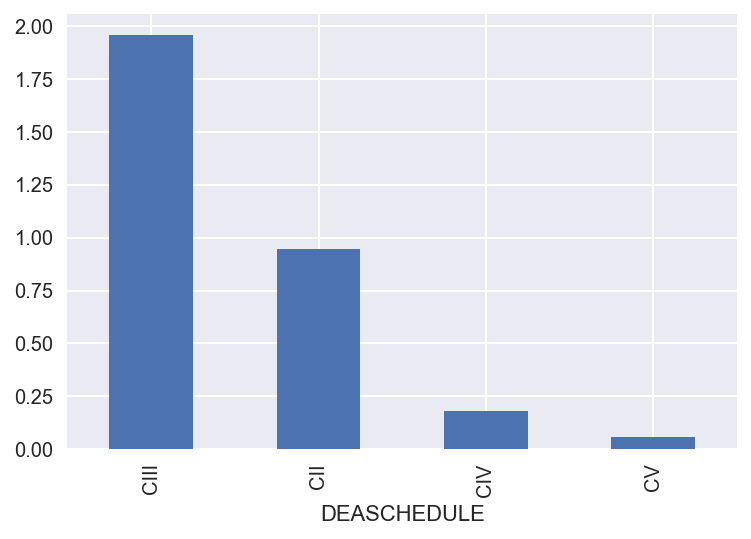

In [126]:
# BY DEA SCHUDEL
drug.groupby('DEASCHEDULE')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar() # by median

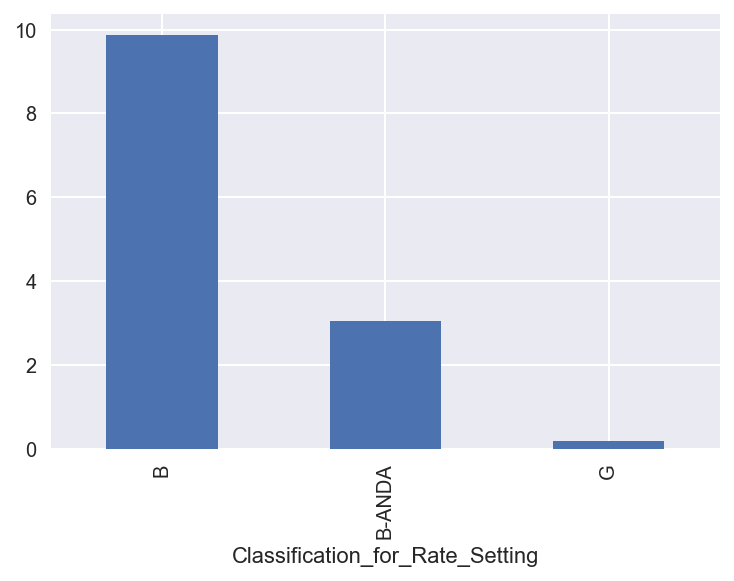

In [127]:
# BRAND VS HALF BRAND VS GENERIC, RESULT IS TOO CLEAR

drug.groupby('Classification_for_Rate_Setting')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar()



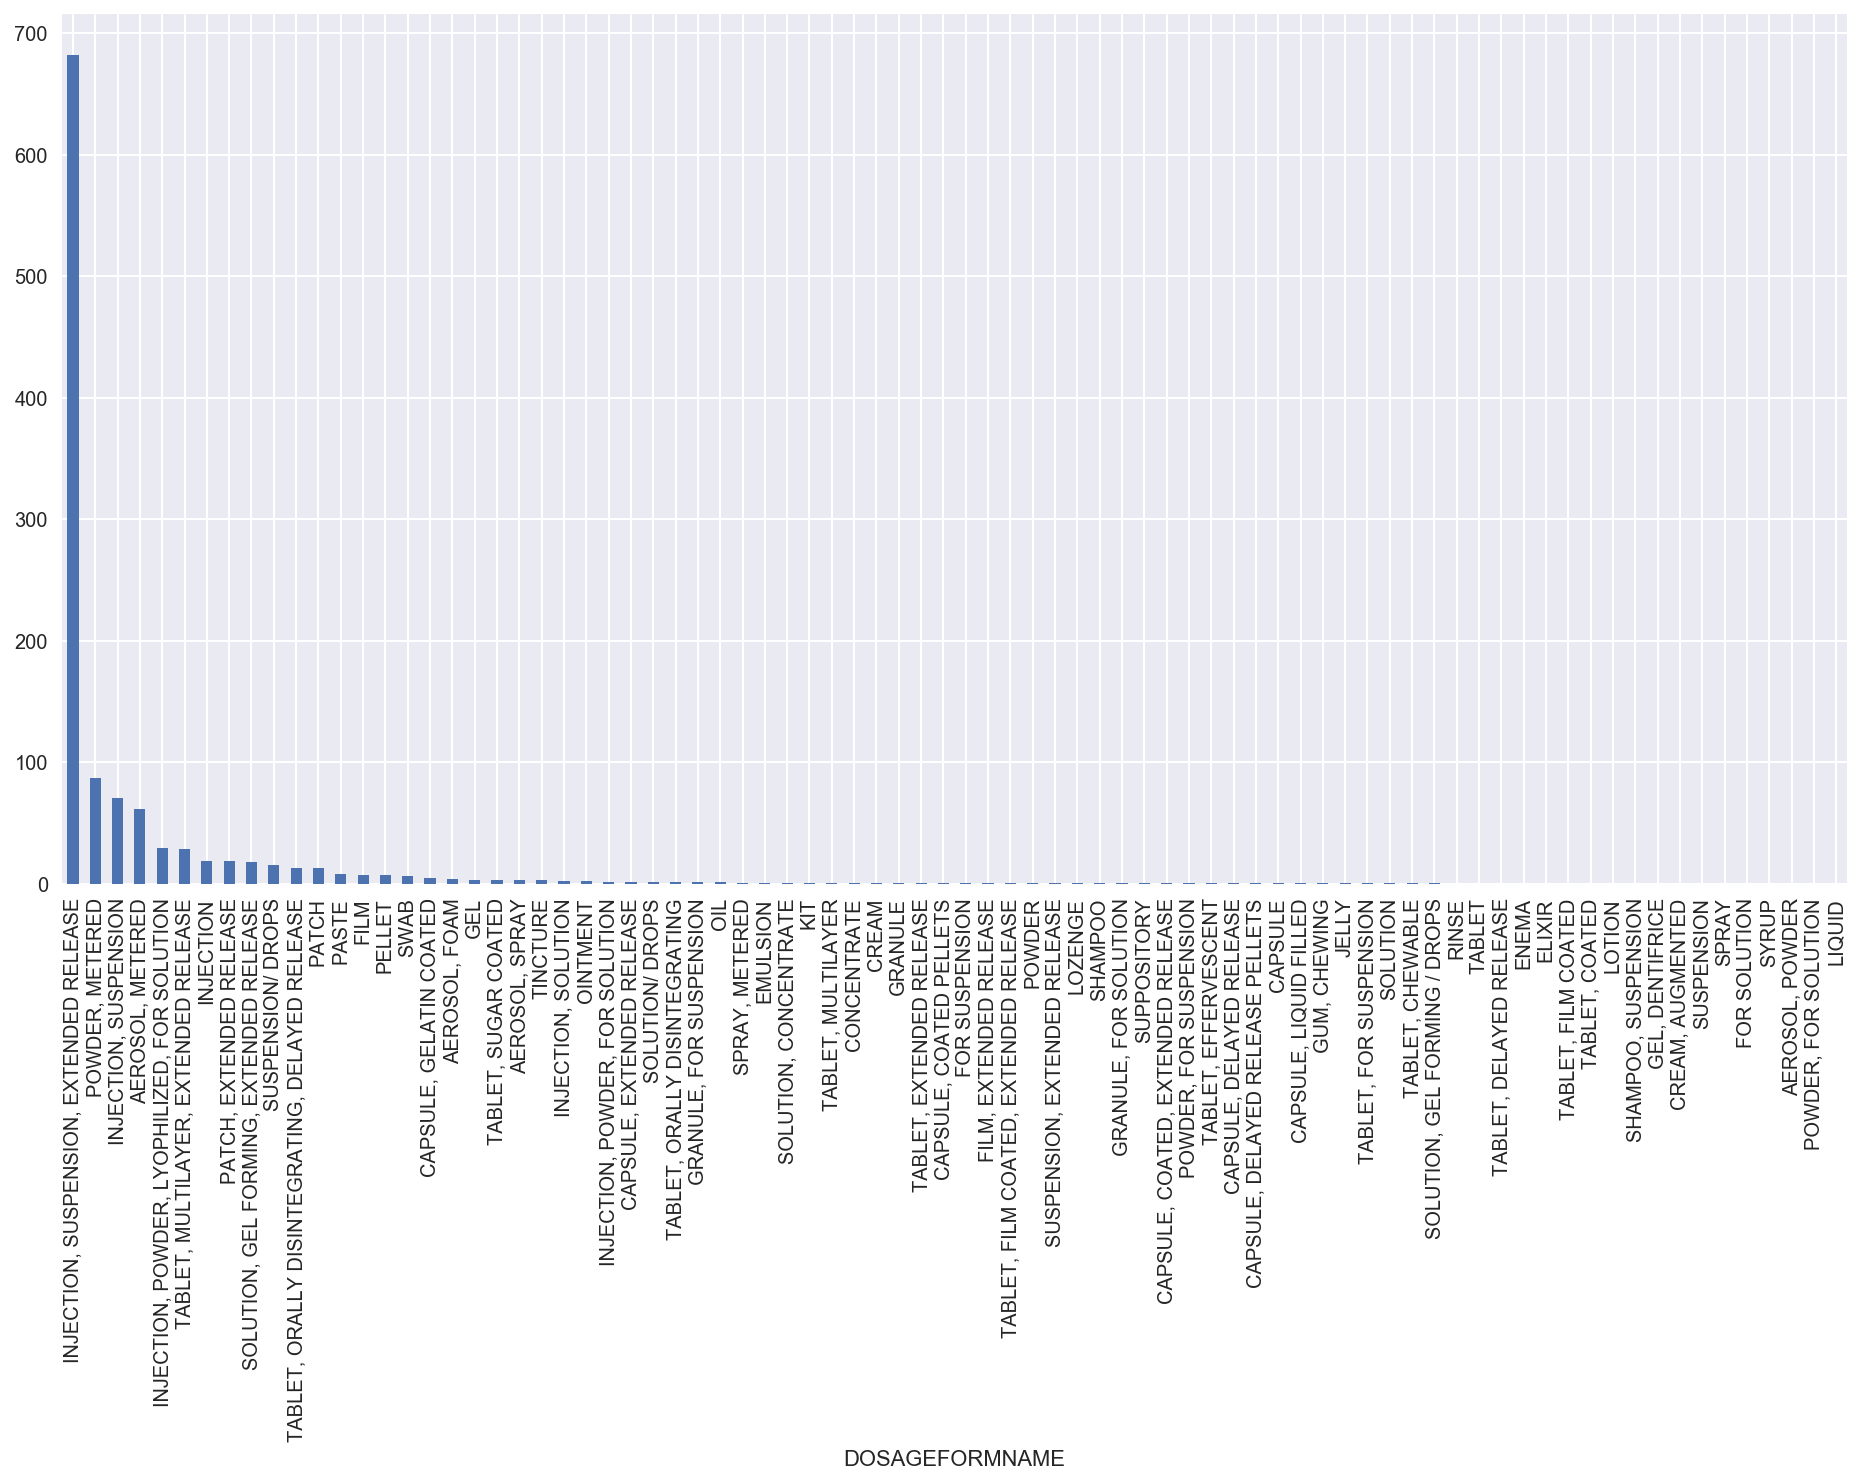

In [134]:

drug.groupby('DOSAGEFORMNAME')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar()

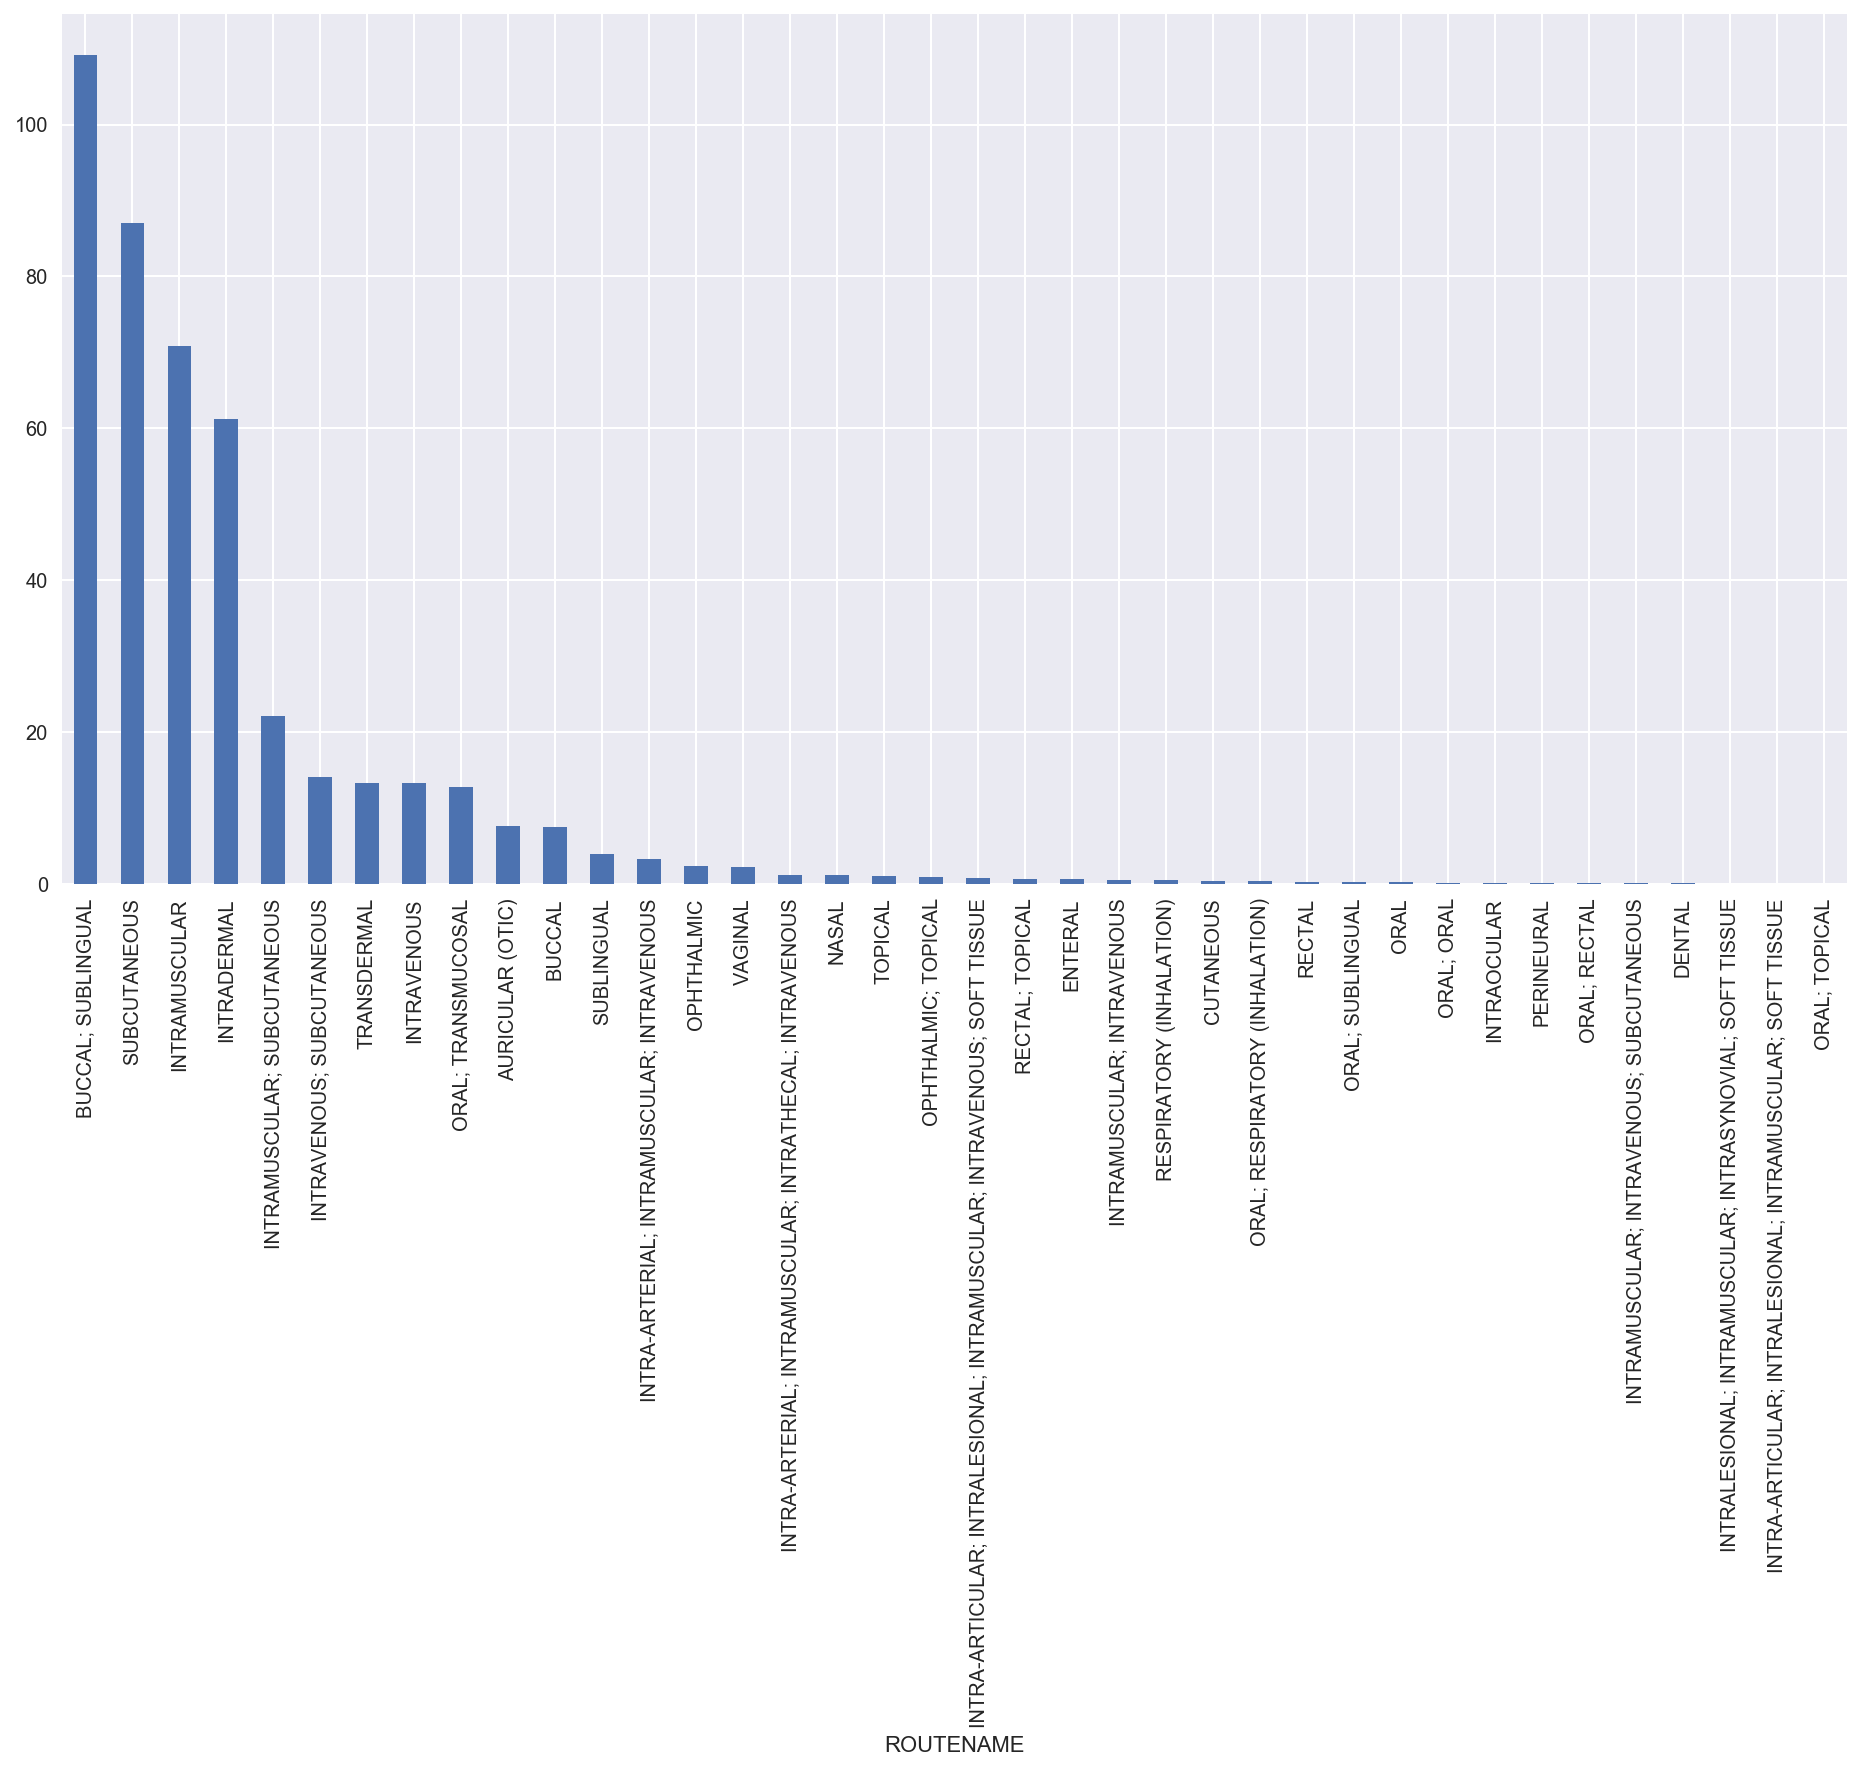

In [135]:
plt.figure(figsize=(16,8))


drug.groupby('ROUTENAME')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar()

In [147]:
drug['date']=pd.to_datetime(drug['STARTMARKETINGDATE'])#.apply(lambda x: x[0:4])
#drug.year.head()

drug.head()

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC_x,NDC10,NDC Description,NDC_y,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,date
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,00093007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,1970-01-01 00:00:00.019590528
1,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_48526b2b-3cef-4d67-8c38-d3e9fca1cf3d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,00093007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,1970-01-01 00:00:00.019590528
2,0009-3116_deaa2a92-7be0-4a9a-ae39-6297d868d630,Sep-16,0009-3116-01,1 BOTTLE in 1 CARTON (0009-3116-01) > 30 mL i...,0009-3116_deaa2a92-7be0-4a9a-ae39-6297d868d630,HUMAN PRESCRIPTION DRUG,Cleocin T,NaN,clindamycin phosphate,SOLUTION,TOPICAL,19800620.0,NaN,NDA,NDA050537,Pharmacia and Upjohn Company LLC,CLINDAMYCIN PHOSPHATE,10,mg/mL,"Decreased Sebaceous Gland Activity [PE],Lincos...",NaN,0009311601,0009311601,PENTOXIFYLLINE ER 400 MG TAB,00093511601,0.17410,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,1970-01-01 00:00:00.019800620
3,10019-553_9caea3f4-e7e2-4d24-b3b6-5e62f37b3ec8,10019-553,10019-553-01,10 POUCH in 1 BOX (10019-553-01) > 1 PATCH in...,10019-553_9caea3f4-e7e2-4d24-b3b6-5e62f37b3ec8,HUMAN PRESCRIPTION DRUG,Transderm Scop,NaN,Scopalamine,"PATCH, EXTENDED RELEASE",TRANSDERMAL,20030101.0,NaN,NDA,NDA017874,Baxter Healthcare Corporation,SCOPOLAMINE,1,mg/3d,"Anticholinergic [EPC],Cholinergic Antagonists ...",NaN,1001955301,1001955301,TRANSDERM-SCOP 1.5 MG/3 DAY,10019055301,20.40381,03/22/2017,EA,C/I,N,"2, 5",B,NaN,NaN,06/07/2017,1970-01-01 00:00:00.020030101
4,10019-553_9caea3f4-e7e2-4d24-b3b6-5e62f37b3ec8,10019-553,10019-553-01,10 POUCH in 1 BOX (10019-553-01) > 1 PATCH in...,10019-553_b877a694-a1d0-4280-937a-a06820b12a88,HUMAN PRESCRIPTION DRUG,Transderm Scop,NaN,Scopalamine,"PATCH, EXTENDED RELEASE",TRANSDERMAL,20161201.0,NaN,NDA,NDA017874,Baxter Healthcare Corporation,SCOPOLAMINE,1,mg/3d,"Anticholinergic [EPC],Cholinergic Antagonists ...",NaN,1001955301,1001955301,TRANSDERM-SCOP 1.5 MG/3 DAY,10019055301,20.40381,03/22/2017,EA,C/I,N,"2, 5",B,NaN,NaN,06/07/2017,1970-01-01 00:00:00.020161201


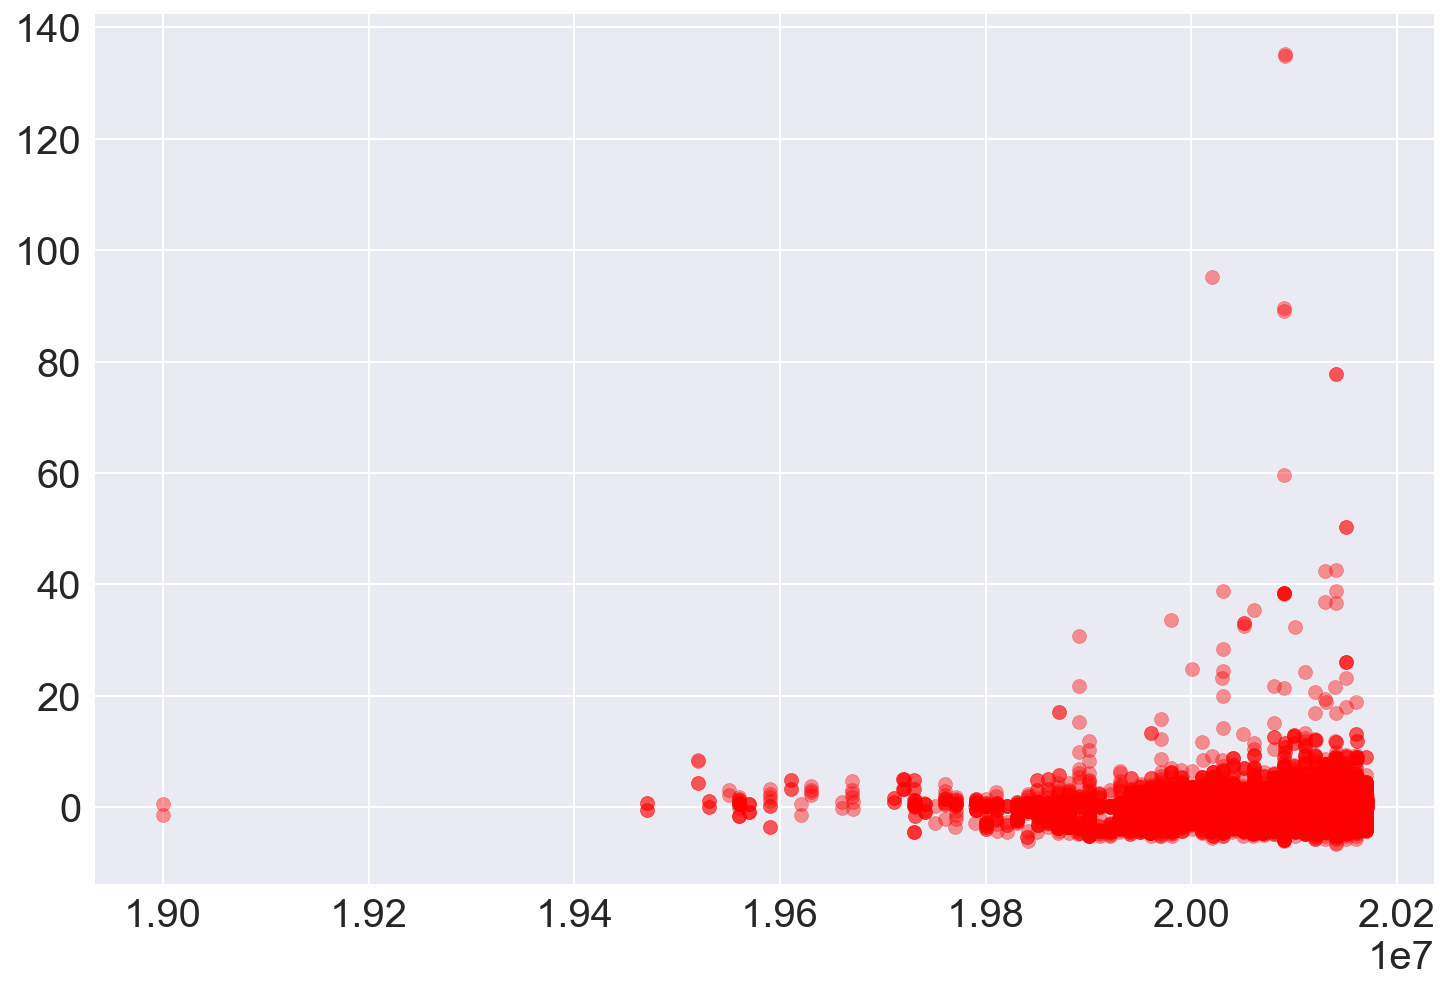

In [149]:
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=drug['STARTMARKETINGDATE'], y=np.log(drug['NADAC_Per_Unit']), c='r', alpha=0.4)
plt.scatter(x=drug['STARTMARKETINGDATE'], y=np.sqrt(drug['NADAC_Per_Unit']), c='r', alpha=0.4)
#sns.regplot(x=x, y=y, data=drug, scatter=False, truncate=True)
#ax.set(title='Price prediction by XGboost', xlabel='real price', ylabel='predicted price')